In [62]:
#import different databases
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
import sklearn as sk #this is the most popular library for statistics and machine learning
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split

In [63]:
#I make a dataframe of the CSV file and show the first 5 results
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


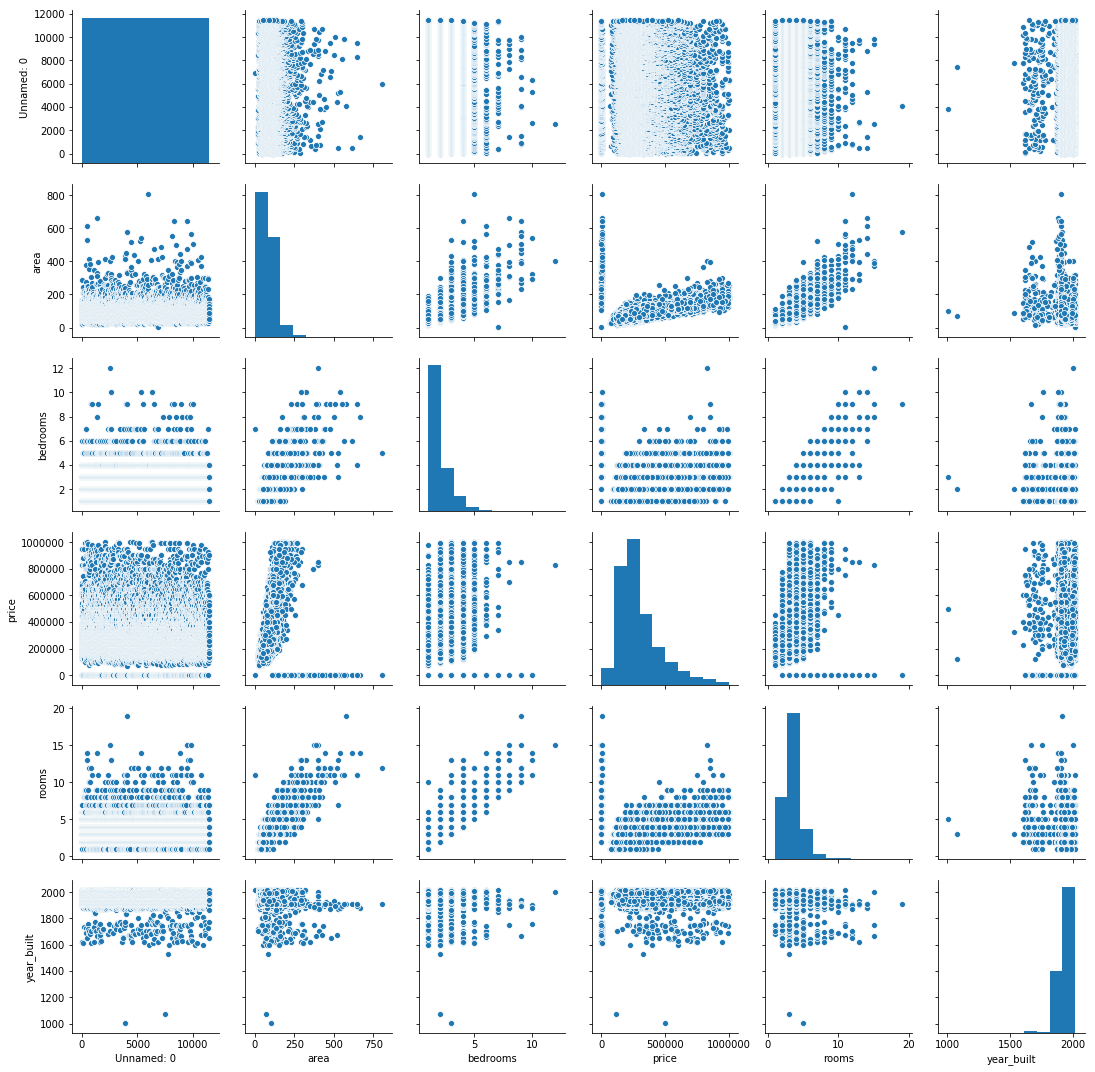

In [64]:
sns.pairplot(df)

In [65]:
#price is dependent
df_ex2 = df[['price', 'area', 'rooms', 'year_built']]

In [66]:
df_ex2 = df_ex2[df_ex2["price"]>30000]
df_ex2 = df_ex2[df_ex2["rooms"]>=1]
df_ex2 = df_ex2[df_ex2["area"]>=1]
df_ex2 = df_ex2[df_ex2["year_built"]>=1600]
df_ex2.head()

,price,area,rooms,year_built
0,510000,108,3,1906
1,215000,47,2,1938
2,325000,116,3,2003
3,315000,58,3,1910
4,200000,63,3,1906


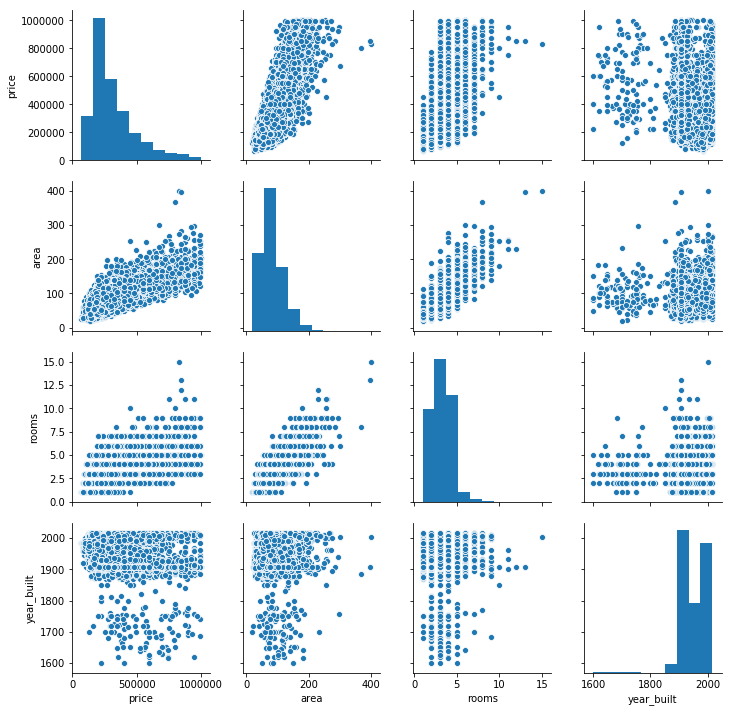

In [67]:
sns.pairplot(df_ex2)

In [68]:
#creat y and x's for the train set
y = df_ex2['price'] #We need to take out the rating as our Y-variable
X = df_ex2.loc[:,'area':'year_built'] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
X.head()

,area,rooms,year_built
0,108,3,1906
1,47,2,1938
2,116,3,2003
3,58,3,1910
4,63,3,1906


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head() #The train data

,area,rooms,year_built
10287,25,2,1906
3116,72,3,1986
9498,31,1,1912
9149,48,3,1906
2601,28,1,2014


In [70]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [71]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
4379.197618,area
-17143.220111,rooms
-1322.697651,year_built


In [72]:
y_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2score = r2_score(y_test, y_p)
print(f'The r2 score is {r2score}')

The r2 score is 0.6237363235066262


In [73]:
MSRE = math.sqrt(mean_squared_error(y_test, y_p))
print(f'The Mean squared error is {MSRE}')

The Mean squared error is 105458.42795878953


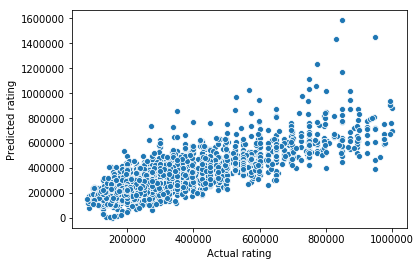

In [74]:
sns.scatterplot(y_test, y_p)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.show()